[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mack-proj-4/projeto-aplicado-4-sem2-2025/blob/main/projeto/tratamento_da_base_de_dados_projeto_aplicado_4.ipynb)

# 📊 INEP — Data Cleaning (2008 - 2022)

✨ Transformando dados brutos em uma base limpa, padronizada e pronta para análise.

🚀 Da planilha original para um dataset utilizável para o projeto.

**📁 Período:** 15 anos de Taxas de Transição (2008 - 2022).

**🔗 Fonte dos dados brutos:** Site oficial de dados abertos do governo. [Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira | Inep - Taxas de transição](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/taxas-de-transicao)

**📝 Observações:**
- Os dados foram baixados em formato `.xlsx` e colocados em uma pasta pública no Google Drive.
- O dado tratado será disponibilizado da mesma forma em formato `.csv` em uma pasta pública do Google Drive.


In [ ]:
# importando as libs necessárias

import pandas as pd

## 1 - Lendo a base de dados RAW

### 1.1 - Listando os IDs publicos dos arquivos no Drive

E criando a URL para acessar o dado publicamente

In [ ]:
# Lista de IDs dos arquivos públicos no drive

PUBLIC_RAW_DATA = {
    "raw_2007_2008": "1kkdNQpeyMlozkdnxMAkzyPOX7h2Lhzvl",
    "raw_2008_2009": "1LCxfXgy6I17vUTxeEeK5uisCpi1Y3Etc",
    "raw_2009_2010": "11La203bhxJaddfX_ZnGU6l61_FAACDwr",
    "raw_2010_2011": "172Um6hmZjrYSLSEpM7IjnK7lx4wBGaku",
    "raw_2011_2012": "1sbLwgjbnj1jTt7XVB1tU80-gXr101OJz",
    "raw_2012_2013": "13p-7qGOTu1_m_kboNaYiKTmqyUOAgFm9",
    "raw_2013_2014": "17LWn-xQlsN_M-0z7SpxsqmRPfBF9JXmQ",
    "raw_2014_2015": "1kIyJWwgDV2Df4Yag16VSY4BGM9eUC3R6",
    "raw_2015_2016": "17S5XC2nwKw2JebjgVMesjziFb5Anuau-",
    "raw_2016_2017": "1D_-xpVVqDKwXbQLLY1aB0Er0llJuQ5Ue",
    "raw_2017_2018": "1S_LckKKV2oAblryztyuBXw4K2dCgyeNK",
    "raw_2018_2019": "11_9F1qfCVeUxh46QMYnFDRl9aOguv_PZ",
    "raw_2019_2020": "15YS7sLTVPyxBodiK8PytNjbOfYunuFOA",
    "raw_2020_2021": "1htf7w0UZuRwuhuormnd9_F_txXU0Bb8y",
    "raw_2021_2022": "1id8MTwmXXkueTbH40kGNHCKvPvz_Zlsv"
}

def get_public_file_url(file_id, format="xlsx", is_google_sheet=True):
    """
    Retorna a URL pública correta para leitura do arquivo.

    file_id: ID do arquivo no Drive
    format: "xlsx" ou "csv"
    is_google_sheet: True se o arquivo é um Google Sheets
                     False se é um arquivo comum do Drive (CSV/XLSX)
    """

    # Caso seja um Google Sheets
    if is_google_sheet:
        return f"https://docs.google.com/spreadsheets/d/{file_id}/export?format={format}"

    # Caso seja um arquivo comum do Drive (CSV ou XLSX)
    # Exemplo: df.to_csv() ou df.to_excel() que você salvou no Drive
    return f"https://drive.google.com/uc?export=download&id={file_id}"

### 1.2 - Dando uma explorada em como o dado está

In [ ]:
test_url = get_public_file_url(PUBLIC_RAW_DATA["raw_2007_2008"], "xlsx")
test_df = pd.read_excel(test_url)

print(f"Quantidade de (Linhas, Colunas): {test_df.shape} \n\n")
test_df.head(10)

Quantidade de (Linhas, Colunas): (194, 68) 




,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,NaN,Instituto Nacional de Estudos e Pesquisas Educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Fluxo Escolar - Taxas de Transição (1), Brasil...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Taxas de Transição(1) (Promoção, Repetência, E...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ano,Unidade Geográfica,Localização,Dependência Administrativa,Taxa de Promoção,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Ensino Fundamental,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Ensino Médio,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,Total,Anos Iniciais,Anos Finais,1º Ano,2º Ano,3º Ano,...,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,Total,1ª série,2ª série,3ª série
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2007/2008,Brasil,Total,Total,79.9,83,76,91.7,78.8,80.8,...,0.6,1,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3
9,2007/2008,Brasil,Urbana,Total,81.8,86.3,76.7,92.9,84.1,83.8,...,0.5,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3


### 1.3 - Testando para todas as bases

Aparentemente o dataset é padronizado da seguinte maneira:
- **194** linhas
- **68** colunas
- Os dados começam a partir da linha **8**

Para ter certeza vamos verificar o shape, a linha 7 e 8 de cada arquivo.


In [ ]:
def inspect_all_raw_sheets(files_dict):
    dfs = {}
    for name, sheet_id in files_dict.items():
        url = get_public_file_url(sheet_id, "xlsx")
        df = pd.read_excel(url)
        dfs[name] = df

        print(f"\n=== {name} ===")
        print("shape:", df.shape)

        # linhas de índice 7 e 8 (ajuste para iloc[6:8] se quiser 6 e 7)
        try:
            display(df.iloc[7:9])
        except NameError:
            print(df.iloc[7:9])

    return dfs

# rodar a inspeção
all_raw_dfs = inspect_all_raw_sheets(PUBLIC_RAW_DATA)



=== raw_2007_2008 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2007/2008,Brasil,Total,Total,79.9,83,76,91.7,78.8,80.8,...,0.6,1,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3



=== raw_2008_2009 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2008/2009,Brasil,Total,Total,81,84.6,76.5,92.4,81.3,81.7,...,0.5,1,2.4,3.2,3.3,2.9,2.5,3.4,2.6,1.3



=== raw_2009_2010 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2009/2010,Brasil,Total,Total,82.2,85.9,77.6,92.8,83.7,82.7,...,0.6,1,2.5,3.3,3.2,2.5,2.1,2.9,2,1



=== raw_2010_2011 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2010/2011,Brasil,Total,Total,83.7,87.5,79.3,93.6,86.5,84,...,0.4,1,2.4,3.3,3.3,2.4,1.9,2.8,2.1,0.9



=== raw_2011_2012 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2011/2012,Brasil,Total,Total,84.9,89,79.9,94.5,89.9,85,...,0.5,1,2.4,3.3,3.3,2.3,2.1,2.7,2.2,1



=== raw_2012_2013 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2012/2013,Brasil,Total,Total,85.6,89.7,80.8,95,91.9,85.8,...,0.4,0.8,2.3,3.3,3.3,2.4,2.3,3,2.3,0.9



=== raw_2013_2014 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2013/2014,Brasil,Total,Total,86.7,90.9,81.7,95.8,94,86.8,...,0.3,0.8,2.3,3.2,3.2,2.2,2.1,2.8,2.2,1



=== raw_2014_2015 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2014/2015,Brasil,Total,Total,86.7,90.9,81.4,95.8,94.6,86.2,...,0.3,0.7,2.2,3,3.2,2.2,2.1,2.6,2.2,1.1



=== raw_2015_2016 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2015/2016,Brasil,Total,Total,87.5,91.4,82.6,95.9,95,87.2,...,0.2,0.6,1.9,3.1,2.8,2.1,2.1,2.9,2.3,1



=== raw_2016_2017 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2016/2017,Brasil,Total,Total,87.5,91.5,82.5,96,95.2,87,...,0.2,0.6,1.9,2.8,3.1,2.4,2.4,3.2,2.6,1.1



=== raw_2017_2018 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,ANO,NO_CODIGO,TIPOLOCA,DEPENDAD,TXPRO_FUN,TXPRO_F14,TXPRO_F58,TXPRO_F00,TXPRO_F01,TXPRO_F02,...,TXEVM_F03,TXEVM_F04,TXEVM_F05,TXEVM_F06,TXEVM_F07,TXEVM_F08,TXEVM_MED,TXEVM_M01,TXEVM_M02,TXEVM_M03
8,2017/2018,Brasil,Total,Total,88.7,92.3,84,96.3,95.7,88,...,0.2,0.6,1.9,2.9,2.9,2.1,2.6,3.3,2.8,1.1



=== raw_2018_2019 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,NU_ANO_CENSO,CODIGO,NO_LOCALIZACAO,NO_DEPENDENCIA,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATFUN_01,1_CAT1_CATFUN_02,1_CAT1_CATFUN_03,...,1_CAT4_CATFUN_04,1_CAT4_CATFUN_05,1_CAT4_CATFUN_06,1_CAT4_CATFUN_07,1_CAT4_CATFUN_08,1_CAT4_CATFUN_09,1_CAT4_CATMED,1_CAT4_CATMED_01,1_CAT4_CATMED_02,1_CAT4_CATMED_03
8,2018/2019,Brasil,Total,Total,89.2,92.6,85,96.4,95.8,88.4,...,0.2,0.5,1.8,2.8,2.8,2.1,2.6,3.3,2.9,1



=== raw_2019_2020 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,NU_ANO_CENSO,CODIGO,NO_LOCALIZACAO,NO_DEPENDENCIA,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATFUN_01,1_CAT1_CATFUN_02,1_CAT1_CATFUN_03,...,1_CAT4_CATFUN_04,1_CAT4_CATFUN_05,1_CAT4_CATFUN_06,1_CAT4_CATFUN_07,1_CAT4_CATFUN_08,1_CAT4_CATFUN_09,1_CAT4_CATMED,1_CAT4_CATMED_01,1_CAT4_CATMED_02,1_CAT4_CATMED_03
8,2019/2020,Brasil,Total,Total,90.6,93.4,87.2,96.5,96,89.9,...,0.2,0.5,1.4,2.3,2.2,1.6,2.1,2.8,2.5,0.9



=== raw_2020_2021 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,NU_ANO_CENSO,CODIGO,NO_LOCALIZACAO,NO_DEPENDENCIA,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATFUN_01,1_CAT1_CATFUN_02,1_CAT1_CATFUN_03,...,1_CAT4_CATFUN_04,1_CAT4_CATFUN_05,1_CAT4_CATFUN_06,1_CAT4_CATFUN_07,1_CAT4_CATFUN_08,1_CAT4_CATFUN_09,1_CAT4_CATMED,1_CAT4_CATMED_01,1_CAT4_CATMED_02,1_CAT4_CATMED_03
8,2020/2021,Brasil,Total,Total,95.2,96.2,93.9,96.1,96.6,96.4,...,0.1,0.2,0.5,1.1,0.8,0.8,1.2,1.6,1.6,0.4



=== raw_2021_2022 ===
shape: (194, 68)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
7,NU_ANO_CENSO,CODIGO,NO_LOCALIZACAO,NO_DEPENDENCIA,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATFUN_01,1_CAT1_CATFUN_02,1_CAT1_CATFUN_03,...,1_CAT4_CATFUN_04,1_CAT4_CATFUN_05,1_CAT4_CATFUN_06,1_CAT4_CATFUN_07,1_CAT4_CATFUN_08,1_CAT4_CATFUN_09,1_CAT4_CATMED,1_CAT4_CATMED_01,1_CAT4_CATMED_02,1_CAT4_CATMED_03
8,2021/2022,Brasil,Total,Total,93.6,95.5,91.2,96.7,96.3,94.9,...,0.1,0.3,0.6,1.8,2.1,1.3,1.8,1.8,2.8,0.6


### 1.4 - Verificando o final das tabelas

Aparentemente estão todas padronizadas da forma como listamos no item anterior.

Agora vamos verificar o final da tabela como está

In [ ]:
all_raw_dfs["raw_2021_2022"].tail(5)


,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
189,2021/2022,Distrito Federal,Total,Privada,96.7,97.4,95.7,97.5,97.2,97.1,...,0,0,0,0,0.1,0,0.4,0.2,0.8,0
190,2021/2022,Distrito Federal,Total,Pública,92.3,93.2,91.2,96.9,97,83,...,0.1,0.3,0.5,2.6,2.6,2.4,4.1,4.4,5.6,1.8
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Fonte: Censo da Educação Básica/Inep.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Nota: (1) - Taxa de promoção: a) proporção de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como podemos ver, a tabela termina na linha **190**


### 1.5 - Juntando as tabelas e renomeando as colunas

Lembrando que estamos lidando com uma tabela que estava formatada para leitura humana e não para uma tabela de dados que pode ser usada para modelar ou explorar, então vamos renomear pensando nisso.


In [ ]:
COLUMN_NAMES_BY_POSITION = [
    "ano_intervalo",
    "unidade_geografica",
    "localizacao",
    "dependencia_adm",

    # Promoção Fundamental
    "tx_prom_fund_total",
    "tx_prom_fund_anos_iniciais",
    "tx_prom_fund_anos_finais",
    "tx_prom_fund_ano1",
    "tx_prom_fund_ano2",
    "tx_prom_fund_ano3",
    "tx_prom_fund_ano4",
    "tx_prom_fund_ano5",
    "tx_prom_fund_ano6",
    "tx_prom_fund_ano7",
    "tx_prom_fund_ano8",
    "tx_prom_fund_ano9",

    # Promoção Médio
    "tx_prom_med_total",
    "tx_prom_med_serie1",
    "tx_prom_med_serie2",
    "tx_prom_med_serie3",

    # Repetência Fundamental
    "tx_rept_fund_total",
    "tx_rept_fund_anos_iniciais",
    "tx_rept_fund_anos_finais",
    "tx_rept_fund_ano1",
    "tx_rept_fund_ano2",
    "tx_rept_fund_ano3",
    "tx_rept_fund_ano4",
    "tx_rept_fund_ano5",
    "tx_rept_fund_ano6",
    "tx_rept_fund_ano7",
    "tx_rept_fund_ano8",
    "tx_rept_fund_ano9",

    # Repetência Médio
    "tx_rept_med_total",
    "tx_rept_med_serie1",
    "tx_rept_med_serie2",
    "tx_rept_med_serie3",

    # Evasão Fundamental
    "tx_evas_fund_total",
    "tx_evas_fund_anos_iniciais",
    "tx_evas_fund_anos_finais",
    "tx_evas_fund_ano1",
    "tx_evas_fund_ano2",
    "tx_evas_fund_ano3",
    "tx_evas_fund_ano4",
    "tx_evas_fund_ano5",
    "tx_evas_fund_ano6",
    "tx_evas_fund_ano7",
    "tx_evas_fund_ano8",
    "tx_evas_fund_ano9",

    # Evasão Médio
    "tx_evas_med_total",
    "tx_evas_med_serie1",
    "tx_evas_med_serie2",
    "tx_evas_med_serie3",

    # Migração EJA Fundamental
    "tx_mig_eja_fund_total",
    "tx_mig_eja_fund_anos_iniciais",
    "tx_mig_eja_fund_anos_finais",
    "tx_mig_eja_fund_ano1",
    "tx_mig_eja_fund_ano2",
    "tx_mig_eja_fund_ano3",
    "tx_mig_eja_fund_ano4",
    "tx_mig_eja_fund_ano5",
    "tx_mig_eja_fund_ano6",
    "tx_mig_eja_fund_ano7",
    "tx_mig_eja_fund_ano8",
    "tx_mig_eja_fund_ano9",

    # Migração EJA Médio
    "tx_mig_eja_med_total",
    "tx_mig_eja_med_serie1",
    "tx_mig_eja_med_serie2",
    "tx_mig_eja_med_serie3",
]

In [ ]:
def process_one_df(df):
    # selecionar linhas úteis
    df_slice = df.iloc[8:190, :].reset_index(drop=True)

    # aplicar nomes padronizados por posição
    df_slice.columns = COLUMN_NAMES_BY_POSITION

    return df_slice

clean_dfs = []

for name, df in all_raw_dfs.items():
    cleaned = process_one_df(df)
    cleaned["fonte"] = name
    clean_dfs.append(cleaned)

df_all = pd.concat(clean_dfs, ignore_index=True)

df_all.shape

(2730, 69)

In [ ]:
df_all.head()

,ano_intervalo,unidade_geografica,localizacao,dependencia_adm,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,...,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,Brasil,Total,Total,79.9,83,76,91.7,78.8,80.8,...,1,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,Brasil,Urbana,Total,81.8,86.3,76.7,92.9,84.1,83.8,...,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,Brasil,Rural,Total,70.1,70,70.5,85.8,60.9,69.2,...,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,Brasil,Total,Federal,90.5,95.1,88.6,94.8,95.1,95.6,...,0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,Brasil,Total,Estadual,79.1,85.9,75.6,93.2,84.3,84.3,...,0.9,2.2,2.9,3.2,3.1,3,3.9,2.9,1.5,raw_2007_2008


### 1.6 - Salvando a base parcial


In [ ]:
df_all.to_csv("taxas_transicao_2007_2022_partial.csv", index=False)

## 2 - Lendo base parcial (Pública)

**sheet_id:** `1T6tvvbS-DSKwKFHNY-OaKsb8USLrkGUb`

> A Base foi salva em CSV


In [ ]:
public_partial_df_url = get_public_file_url("1T6tvvbS-DSKwKFHNY-OaKsb8USLrkGUb", format="csv", is_google_sheet=False)
print(public_partial_df_url)
df_partial = pd.read_csv(public_partial_df_url)

df_partial.shape

https://drive.google.com/uc?export=download&id=1T6tvvbS-DSKwKFHNY-OaKsb8USLrkGUb


(2730, 69)

In [ ]:
df_partial.head()

,ano_intervalo,unidade_geografica,localizacao,dependencia_adm,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,...,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,Brasil,Total,Total,79.9,83.0,76.0,91.7,78.8,80.8,...,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,Brasil,Urbana,Total,81.8,86.3,76.7,92.9,84.1,83.8,...,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,Brasil,Rural,Total,70.1,70.0,70.5,85.8,60.9,69.2,...,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,Brasil,Total,Federal,90.5,95.1,88.6,94.8,95.1,95.6,...,0.0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,Brasil,Total,Estadual,79.1,85.9,75.6,93.2,84.3,84.3,...,0.9,2.2,2.9,3.2,3.1,3.0,3.9,2.9,1.5,raw_2007_2008


In [ ]:
# config para mostrar todas as colunas, pois por padrão só mostra 20 colunas
pd.set_option('display.max_columns', None)

df_partial

,ano_intervalo,unidade_geografica,localizacao,dependencia_adm,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,Brasil,Total,Total,79.9,83.0,76.0,91.7,78.8,80.8,84.9,83.6,73.8,76.6,79.1,75.1,70.1,63.3,71.1,79.9,13.5,13.3,13.8,6.2,17.8,16.1,11.4,11.1,17.2,13.8,11.0,12.2,13.0,16.8,11.4,8.7,5.0,3.2,7.2,2.0,3.2,2.8,3.1,4.3,6.6,6.4,6.6,9.8,14.2,16.4,14.8,10.1,1.6,0.5,3.0,0.1,0.2,0.3,0.6,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,Brasil,Urbana,Total,81.8,86.3,76.7,92.9,84.1,83.8,87.8,86.1,74.8,77.2,79.5,75.6,70.1,63.2,71.1,79.8,12.2,10.9,13.7,5.2,13.3,13.8,9.4,9.9,16.7,13.6,11.0,12.5,13.0,16.9,11.4,8.8,4.4,2.4,6.7,1.8,2.4,2.1,2.3,3.1,6.1,6.0,6.2,9.0,14.2,16.3,14.7,10.1,1.6,0.4,2.9,0.1,0.2,0.3,0.5,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,Brasil,Rural,Total,70.1,70.0,70.5,85.8,60.9,69.2,73.2,72.0,66.6,71.5,75.3,70.6,70.8,64.3,71.2,82.2,20.6,22.9,15.0,10.9,32.6,24.8,19.8,16.7,20.5,15.1,11.2,9.4,10.9,13.5,9.6,7.9,7.9,6.4,11.5,3.2,6.2,5.4,6.1,9.7,10.3,9.9,10.3,17.7,16.6,19.7,17.8,9.4,1.4,0.7,3.0,0.1,0.3,0.6,0.9,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,Brasil,Total,Federal,90.5,95.1,88.6,94.8,95.1,95.6,93.9,95.9,90.2,87.6,88.0,88.8,81.1,76.3,81.7,88.2,8.2,4.4,9.8,4.7,4.4,4.1,5.5,3.5,9.0,11.1,10.4,8.6,10.9,15.4,8.4,7.0,0.9,0.5,1.0,0.5,0.5,0.3,0.6,0.6,0.6,0.8,0.9,1.8,6.8,6.7,9,4.1,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,Brasil,Total,Estadual,79.1,85.9,75.6,93.2,84.3,84.3,88.5,84.3,74.4,76.7,78.1,73.1,67.5,60.5,68.6,77.6,13.4,11.1,14.7,4.7,13.1,13.2,8.7,11.5,17.3,14.3,12.1,14.5,14.0,17.9,12.5,9.6,5.4,2.6,6.9,1.9,2.5,2.3,2.3,3.3,6.1,6.1,6.6,9.3,15.5,17.7,16,11.3,2.1,0.4,2.8,0.2,0.1,0.2,0.5,0.9,2.2,2.9,3.2,3.1,3.0,3.9,2.9,1.5,raw_2007_2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2021/2022,Goiás,Total,Pública,92.8,94.6,90.8,95.7,95.5,93.7,93.9,94.4,93.8,92.0,90.1,87.1,85.1,82.4,78.2,96.9,3.3,3.7,2.9,2.8,3.0,4.9,4.9,3.1,3.2,3.3,3.0,1.9,2.7,4.0,2.4,1.3,3.4,1.7,5.5,1.5,1.5,1.4,1.2,2.4,2.7,3.9,5.5,9.9,10.1,11.7,15.6,1.2,0.5,0.0,0.8,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.4,1.1,2.1,1.9,3.8,0.6,raw_2021_2022
2726,2021/2022,Distrito Federal,Total,Total,93.4,94.3,92.3,97.1,97.0,86.7,97.4,93.6,96.7,89.6,93.6,89.3,82.6,79.5,78.8,91.7,4.0,4.4,3.6,1.9,1.7,12.0,1.5,4.7,1.5,5.9,2.1,4.6,6.9,9.6,6.9,2.9,1.8,1.2,2.6,1.0,1.3,1.3,1.1,1.4,1.3,2.5,2.3,4.2,7.3,7.4,9.7,4.0,0.8,0.1,1.5,0.0,0.0,0.0,0.0,0.3,0.5,2.0,2.0,1.9,3.2,3.5,4.6,1.4,raw_2021_2022
2727,2021/2022,Distrito Federal,Urbana,Total,93.5,94.4,

### 2.1 - Separando somente as linhas com "Total" agregado

In [ ]:
df_filtered = df_partial[
    (df_partial['dependencia_adm'] == 'Total') &
    (df_partial['localizacao'] == 'Total')
]

print(f"Shape do DataFrame filtrado: {df_filtered.shape}")
df_filtered.head()

Shape do DataFrame filtrado: (495, 69)


,ano_intervalo,unidade_geografica,localizacao,dependencia_adm,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,Brasil,Total,Total,79.9,83.0,76.0,91.7,78.8,80.8,84.9,83.6,73.8,76.6,79.1,75.1,70.1,63.3,71.1,79.9,13.5,13.3,13.8,6.2,17.8,16.1,11.4,11.1,17.2,13.8,11.0,12.2,13.0,16.8,11.4,8.7,5.0,3.2,7.2,2.0,3.2,2.8,3.1,4.3,6.6,6.4,6.6,9.8,14.2,16.4,14.8,10.1,1.6,0.5,3.0,0.1,0.2,0.3,0.6,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
8,2007/2008,Norte,Total,Total,72.3,72.3,72.4,90.2,63.7,70.9,76.8,75.0,69.7,72.0,76.7,72.6,66.5,61.8,67.4,73.1,18.4,20.9,14.3,6.4,29.9,23.6,16.8,14.4,17.8,14.4,10.9,12.2,12.0,14.7,10.8,9.1,7.4,6.1,9.6,3.3,6.1,5.1,5.6,8.7,9.3,8.9,8.4,12.4,19.3,20.4,19.8,17.1,1.9,0.7,3.7,0.1,0.3,0.4,0.8,1.9,3.2,4.7,4.0,2.8,2.2,3.1,2,0.7,raw_2007_2008
16,2007/2008,Nordeste,Total,Total,71.8,74.9,67.5,86.9,69.8,72.9,76.2,75.8,62.8,67.5,72.4,69.8,66.5,59.4,67.3,77.2,18.4,18.9,17.6,9.5,24.7,21.7,17.5,15.2,23.0,18.0,13.2,13.0,13.5,16.1,12.1,10.9,7.7,5.4,10.9,3.5,5.1,4.9,5.2,7.3,10.4,9.9,10.0,14.0,18.2,21.5,19.2,11.4,2.1,0.8,4.0,0.1,0.4,0.5,1.1,1.7,3.8,4.6,4.4,3.2,1.8,3.0,1.4,0.5,raw_2007_2008
24,2007/2008,Sudeste,Total,Total,86.9,90.7,82.5,93.9,91.0,88.4,92.8,89.1,83.2,84.2,84.4,77.6,73.2,67.1,73.8,81.8,9.2,7.8,10.9,4.9,7.7,10.4,5.7,8.6,11.9,10.0,8.9,12.6,12.6,17.0,11.1,7.5,2.7,1.3,4.5,1.2,1.1,1.0,1.2,1.8,3.4,3.7,4.2,6.9,10.7,11.8,11.2,8.5,1.2,0.2,2.1,0.0,0.2,0.2,0.3,0.5,1.5,2.1,2.5,2.9,3.5,4.1,3.9,2.2,raw_2007_2008
32,2007/2008,Sul,Total,Total,84.3,89.3,78.7,95.8,84.9,86.9,90.8,90.8,77.3,78.0,80.0,80.3,71.9,62.6,74.2,84.5,11.6,9.5,13.9,3.5,14.0,12.1,7.9,7.5,17.0,15.1,12.4,9.6,13.7,19.1,11.5,7.4,3.1,1.0,5.4,0.7,1.0,0.8,1.0,1.4,4.2,4.7,5.1,8.2,12.5,15.9,12.3,7.2,1.0,0.2,2.0,0.0,0.1,0.2,0.3,0.3,1.5,2.2,2.5,1.9,1.9,2.4,2,0.9,raw_2007_2008


In [ ]:
df_partial['unidade_geografica'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste',
       'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

### 2.2 - Retirando as colunas que não fazem mais sentido

In [ ]:
# Separando as bases
df_total = df_partial.copy()
df_total_limpo = df_total.drop(['dependencia_adm', 'localizacao'], axis=1)

df_total_limpo.head()

,ano_intervalo,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,Brasil,79.9,83.0,76.0,91.7,78.8,80.8,84.9,83.6,73.8,76.6,79.1,75.1,70.1,63.3,71.1,79.9,13.5,13.3,13.8,6.2,17.8,16.1,11.4,11.1,17.2,13.8,11.0,12.2,13.0,16.8,11.4,8.7,5.0,3.2,7.2,2.0,3.2,2.8,3.1,4.3,6.6,6.4,6.6,9.8,14.2,16.4,14.8,10.1,1.6,0.5,3.0,0.1,0.2,0.3,0.6,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,Brasil,81.8,86.3,76.7,92.9,84.1,83.8,87.8,86.1,74.8,77.2,79.5,75.6,70.1,63.2,71.1,79.8,12.2,10.9,13.7,5.2,13.3,13.8,9.4,9.9,16.7,13.6,11.0,12.5,13.0,16.9,11.4,8.8,4.4,2.4,6.7,1.8,2.4,2.1,2.3,3.1,6.1,6.0,6.2,9.0,14.2,16.3,14.7,10.1,1.6,0.4,2.9,0.1,0.2,0.3,0.5,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,Brasil,70.1,70.0,70.5,85.8,60.9,69.2,73.2,72.0,66.6,71.5,75.3,70.6,70.8,64.3,71.2,82.2,20.6,22.9,15.0,10.9,32.6,24.8,19.8,16.7,20.5,15.1,11.2,9.4,10.9,13.5,9.6,7.9,7.9,6.4,11.5,3.2,6.2,5.4,6.1,9.7,10.3,9.9,10.3,17.7,16.6,19.7,17.8,9.4,1.4,0.7,3.0,0.1,0.3,0.6,0.9,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,Brasil,90.5,95.1,88.6,94.8,95.1,95.6,93.9,95.9,90.2,87.6,88.0,88.8,81.1,76.3,81.7,88.2,8.2,4.4,9.8,4.7,4.4,4.1,5.5,3.5,9.0,11.1,10.4,8.6,10.9,15.4,8.4,7.0,0.9,0.5,1.0,0.5,0.5,0.3,0.6,0.6,0.6,0.8,0.9,1.8,6.8,6.7,9,4.1,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,Brasil,79.1,85.9,75.6,93.2,84.3,84.3,88.5,84.3,74.4,76.7,78.1,73.1,67.5,60.5,68.6,77.6,13.4,11.1,14.7,4.7,13.1,13.2,8.7,11.5,17.3,14.3,12.1,14.5,14.0,17.9,12.5,9.6,5.4,2.6,6.9,1.9,2.5,2.3,2.3,3.3,6.1,6.1,6.6,9.3,15.5,17.7,16,11.3,2.1,0.4,2.8,0.2,0.1,0.2,0.5,0.9,2.2,2.9,3.2,3.1,3.0,3.9,2.9,1.5,raw_2007_2008


### 2.3 - Tratando a coluna "ano_intervalo"

In [ ]:
# separa a coluna "ano_intervalo" em duas

df_total_limpo[['ano_inicio', 'ano_fim']] = df_total_limpo['ano_intervalo'].str.split('/', expand=True)

# remonta a ordem das colunas manualmente
df_total_limpo = df_total_limpo[['ano_intervalo', 'ano_inicio', 'ano_fim'] +
    [col for col in df_total_limpo.columns if col not in ['ano_intervalo', 'ano_inicio', 'ano_fim']]]

df_total_limpo.head()

,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,2007,2008,Brasil,79.9,83.0,76.0,91.7,78.8,80.8,84.9,83.6,73.8,76.6,79.1,75.1,70.1,63.3,71.1,79.9,13.5,13.3,13.8,6.2,17.8,16.1,11.4,11.1,17.2,13.8,11.0,12.2,13.0,16.8,11.4,8.7,5.0,3.2,7.2,2.0,3.2,2.8,3.1,4.3,6.6,6.4,6.6,9.8,14.2,16.4,14.8,10.1,1.6,0.5,3.0,0.1,0.2,0.3,0.6,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,2007,2008,Brasil,81.8,86.3,76.7,92.9,84.1,83.8,87.8,86.1,74.8,77.2,79.5,75.6,70.1,63.2,71.1,79.8,12.2,10.9,13.7,5.2,13.3,13.8,9.4,9.9,16.7,13.6,11.0,12.5,13.0,16.9,11.4,8.8,4.4,2.4,6.7,1.8,2.4,2.1,2.3,3.1,6.1,6.0,6.2,9.0,14.2,16.3,14.7,10.1,1.6,0.4,2.9,0.1,0.2,0.3,0.5,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,2007,2008,Brasil,70.1,70.0,70.5,85.8,60.9,69.2,73.2,72.0,66.6,71.5,75.3,70.6,70.8,64.3,71.2,82.2,20.6,22.9,15.0,10.9,32.6,24.8,19.8,16.7,20.5,15.1,11.2,9.4,10.9,13.5,9.6,7.9,7.9,6.4,11.5,3.2,6.2,5.4,6.1,9.7,10.3,9.9,10.3,17.7,16.6,19.7,17.8,9.4,1.4,0.7,3.0,0.1,0.3,0.6,0.9,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,2007,2008,Brasil,90.5,95.1,88.6,94.8,95.1,95.6,93.9,95.9,90.2,87.6,88.0,88.8,81.1,76.3,81.7,88.2,8.2,4.4,9.8,4.7,4.4,4.1,5.5,3.5,9.0,11.1,10.4,8.6,10.9,15.4,8.4,7.0,0.9,0.5,1.0,0.5,0.5,0.3,0.6,0.6,0.6,0.8,0.9,1.8,6.8,6.7,9,4.1,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,2007,2008,Brasil,79.1,85.9,75.6,93.2,84.3,84.3,88.5,84.3,74.4,76.7,78.1,73.1,67.5,60.5,68.6,77.6,13.4,11.1,14.7,4.7,13.1,13.2,8.7,11.5,17.3,14.3,12.1,14.5,14.0,17.9,12.5,9.6,5.4,2.6,6.9,1.9,2.5,2.3,2.3,3.3,6.1,6.1,6.6,9.3,15.5,17.7,16,11.3,2.1,0.4,2.8,0.2,0.1,0.2,0.5,0.9,2.2,2.9,3.2,3.1,3.0,3.9,2.9,1.5,raw_2007_2008


### 2.4 - Agora separando por "unidade_geografica"

#### 2.4.1 - Brasil

In [ ]:
df_brasil = df_total_limpo[
    (df_total_limpo['unidade_geografica'] == 'Brasil')
]

print(f"Shape do DataFrame df_brasil filtrado: {df_brasil.shape}\n\n")
print(f"Valores da coluna unidade_geografica em df_brasil: {df_brasil['unidade_geografica'].unique()}\n\n")

df_brasil = df_brasil.reset_index(drop=True)

df_brasil.head()

Shape do DataFrame df_brasil filtrado: (120, 69)


Valores da coluna unidade_geografica em df_brasil: ['Brasil']




,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,2007,2008,Brasil,79.9,83.0,76.0,91.7,78.8,80.8,84.9,83.6,73.8,76.6,79.1,75.1,70.1,63.3,71.1,79.9,13.5,13.3,13.8,6.2,17.8,16.1,11.4,11.1,17.2,13.8,11.0,12.2,13.0,16.8,11.4,8.7,5.0,3.2,7.2,2.0,3.2,2.8,3.1,4.3,6.6,6.4,6.6,9.8,14.2,16.4,14.8,10.1,1.6,0.5,3.0,0.1,0.2,0.3,0.6,1.0,2.4,3.2,3.3,2.9,2.7,3.5,2.7,1.3,raw_2007_2008
1,2007/2008,2007,2008,Brasil,81.8,86.3,76.7,92.9,84.1,83.8,87.8,86.1,74.8,77.2,79.5,75.6,70.1,63.2,71.1,79.8,12.2,10.9,13.7,5.2,13.3,13.8,9.4,9.9,16.7,13.6,11.0,12.5,13.0,16.9,11.4,8.8,4.4,2.4,6.7,1.8,2.4,2.1,2.3,3.1,6.1,6.0,6.2,9.0,14.2,16.3,14.7,10.1,1.6,0.4,2.9,0.1,0.2,0.3,0.5,0.9,2.4,3.2,3.3,2.9,2.7,3.6,2.8,1.3,raw_2007_2008
2,2007/2008,2007,2008,Brasil,70.1,70.0,70.5,85.8,60.9,69.2,73.2,72.0,66.6,71.5,75.3,70.6,70.8,64.3,71.2,82.2,20.6,22.9,15.0,10.9,32.6,24.8,19.8,16.7,20.5,15.1,11.2,9.4,10.9,13.5,9.6,7.9,7.9,6.4,11.5,3.2,6.2,5.4,6.1,9.7,10.3,9.9,10.3,17.7,16.6,19.7,17.8,9.4,1.4,0.7,3.0,0.1,0.3,0.6,0.9,1.6,2.6,3.5,3.2,2.3,1.7,2.5,1.4,0.5,raw_2007_2008
3,2007/2008,2007,2008,Brasil,90.5,95.1,88.6,94.8,95.1,95.6,93.9,95.9,90.2,87.6,88.0,88.8,81.1,76.3,81.7,88.2,8.2,4.4,9.8,4.7,4.4,4.1,5.5,3.5,9.0,11.1,10.4,8.6,10.9,15.4,8.4,7.0,0.9,0.5,1.0,0.5,0.5,0.3,0.6,0.6,0.6,0.8,0.9,1.8,6.8,6.7,9,4.1,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.7,0.8,1.2,1.6,0.9,0.7,raw_2007_2008
4,2007/2008,2007,2008,Brasil,79.1,85.9,75.6,93.2,84.3,84.3,88.5,84.3,74.4,76.7,78.1,73.1,67.5,60.5,68.6,77.6,13.4,11.1,14.7,4.7,13.1,13.2,8.7,11.5,17.3,14.3,12.1,14.5,14.0,17.9,12.5,9.6,5.4,2.6,6.9,1.9,2.5,2.3,2.3,3.3,6.1,6.1,6.6,9.3,15.5,17.7,16,11.3,2.1,0.4,2.8,0.2,0.1,0.2,0.5,0.9,2.2,2.9,3.2,3.1,3.0,3.9,2.9,1.5,raw_2007_2008


#### 2.4.2 - Regiões do Brasil

In [ ]:
df_regioes = df_total_limpo[
    df_total_limpo['unidade_geografica'].isin(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
]

print(f"Shape do DataFrame df_regioes filtrado: {df_regioes.shape}\n\n")
print(f"Valores da coluna unidade_geografica em df_regioes: {df_regioes['unidade_geografica'].unique()}\n\n")

df_regioes = df_regioes.reset_index(drop=True)

df_regioes.head()


Shape do DataFrame df_regioes filtrado: (600, 69)


Valores da coluna unidade_geografica em df_regioes: ['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']




,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,2007,2008,Norte,72.3,72.3,72.4,90.2,63.7,70.9,76.8,75.0,69.7,72.0,76.7,72.6,66.5,61.8,67.4,73.1,18.4,20.9,14.3,6.4,29.9,23.6,16.8,14.4,17.8,14.4,10.9,12.2,12.0,14.7,10.8,9.1,7.4,6.1,9.6,3.3,6.1,5.1,5.6,8.7,9.3,8.9,8.4,12.4,19.3,20.4,19.8,17.1,1.9,0.7,3.7,0.1,0.3,0.4,0.8,1.9,3.2,4.7,4.0,2.8,2.2,3.1,2,0.7,raw_2007_2008
1,2007/2008,2007,2008,Norte,76.8,79.5,73.2,93.0,74.4,76.0,82.4,81.5,70.7,72.4,77.2,74.1,66.4,61.6,67.3,72.8,15.5,16.0,14.7,4.4,21.5,20.3,13.2,12.0,18.1,14.8,11.4,12.9,12.1,14.9,10.9,9.2,5.8,3.8,8.3,2.5,3.9,3.3,3.6,4.9,8.0,8.0,7.5,10.2,19.4,20.3,19.9,17.3,1.9,0.7,3.8,0.1,0.2,0.4,0.8,1.6,3.2,4.8,3.9,2.8,2.1,3.2,1.9,0.7,raw_2007_2008
2,2007/2008,2007,2008,Norte,61.2,58.5,69.0,78.4,48.3,61.4,65.7,60.5,66.2,70.2,74.9,65.0,71.0,65.4,71.4,80.9,25.6,30.2,12.6,14.6,42.1,29.6,23.9,19.8,16.8,12.4,8.8,8.3,9.7,11.6,9.9,6.0,11.6,10.4,14.9,6.9,9.3,8.5,9.5,17.2,14.1,12.7,12.3,23.8,18.0,21.2,17.5,12.6,1.6,0.9,3.5,0.1,0.3,0.5,0.9,2.5,2.9,4.7,4.0,2.9,1.3,1.8,1.2,0.5,raw_2007_2008
3,2007/2008,2007,2008,Norte,91.7,96.2,88.7,NaN,95.6,97.9,96.7,94.8,89.3,87.5,87.9,90.2,80.8,74.0,84.7,87.5,7.0,3.6,9.2,NaN,4.4,2.1,3.0,4.6,8.9,11.3,9.6,7.0,13.4,17.9,11.7,8.2,0.9,0.2,1.4,NaN,0.0,0.0,0.3,0.6,1.6,0.4,1.7,1.8,4.6,6.0,3.3,3.9,0.4,0.0,0.7,NaN,0.0,0.0,0.0,0.0,0.2,0.8,0.8,1.0,1.2,2.1,0.3,0.4,raw_2007_2008
4,2007/2008,2007,2008,Norte,75.2,77.3,73.5,95.5,71.4,75.8,81.0,78.0,71.2,72.7,76.8,74.3,65.0,60.1,65.9,71.6,15.7,17.1,14.7,2.4,23.3,19.8,14.0,13.7,18.0,15.1,11.8,12.4,12.5,15.2,11.3,9.5,6.9,4.9,8.3,2.0,5.1,4.0,4.4,6.7,7.8,8.0,7.7,10.2,20.3,21.4,20.7,18.3,2.2,0.7,3.5,0.1,0.2,0.4,0.6,1.6,3.0,4.2,3.7,3.1,2.2,3.3,2.1,0.6,raw_2007_2008


#### 2.4.3 - Estados do Brasil

In [ ]:
df_estados = df_total_limpo[
    ~df_total_limpo['unidade_geografica'].isin(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste', 'Brasil'])
]

print(f"Shape do DataFrame df_estados filtrado: {df_estados.shape}\n\n")
print(f"Valores da coluna unidade_geografica em df_estados: {df_estados['unidade_geografica'].unique()}\n\n")

df_estados = df_estados.reset_index(drop=True)

df_estados.head()

Shape do DataFrame df_estados filtrado: (2010, 69)


Valores da coluna unidade_geografica em df_estados: ['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal']




,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,2007,2008,Rondônia,78.2,83.4,71.7,95.6,76.3,81.6,84.9,85.7,69.2,70.9,74.9,73.2,68.9,61.6,71,80.7,15.6,14.0,17.5,2.4,21.3,16.4,12.8,10.5,22.0,18.8,13.8,12.2,11.9,16.5,9.4,6.1,4.3,2.2,6.8,1.8,2.3,1.8,2.0,3.1,6.1,5.9,6.4,9.9,11.2,12.5,11.1,8.7,1.9,0.4,4.0,0.2,0.1,0.2,0.3,0.7,2.7,4.4,4.9,4.7,8.0,9.4,8.5,4.5,raw_2007_2008
1,2007/2008,2007,2008,Rondônia,78.8,85.2,71.3,95.6,80.7,82.8,85.6,86.7,68.7,70.2,73.9,74.2,68.8,61.6,70.9,80.5,15.4,12.7,18.6,2.3,17.4,15.6,12.5,10.3,23.0,19.8,15.0,13.7,12.0,16.7,9.5,6.1,3.5,1.8,5.5,1.8,1.8,1.5,1.6,2.2,5.1,5.1,5.4,6.9,11.0,12.2,10.9,8.8,2.3,0.3,4.6,0.3,0.1,0.1,0.3,0.8,3.2,4.9,5.7,5.2,8.2,9.5,8.7,4.6,raw_2007_2008
2,2007/2008,2007,2008,Rondônia,76.4,78.9,72.8,95.3,65.6,78.9,83.2,82.8,70.6,73.3,78.1,69.6,70.6,62.2,73.6,85.6,15.9,17.4,13.8,3.0,30.7,18.5,13.5,10.9,18.6,15.6,9.7,7.1,9.8,13.0,8.1,5.2,6.6,3.4,11.0,1.7,3.6,2.4,3.0,5.6,9.1,8.5,9.7,20.0,15.2,18.3,15.7,6.9,1.1,0.3,2.4,0.0,0.1,0.2,0.3,0.7,1.7,2.6,2.5,3.3,4.4,6.5,2.6,2.3,raw_2007_2008
3,2007/2008,2007,2008,Rondônia,95.0,95.9,93.6,96.9,94.6,97.2,95.9,96.1,94.8,94.2,93.3,91.5,86.9,82.2,86.2,94.6,3.8,3.1,4.8,2.1,4.2,2.0,3.5,2.8,3.6,4.6,5.4,6.0,3.8,6.9,2.6,0.6,1.1,1.0,1.3,1.0,1.2,0.8,0.6,1.1,1.3,1.1,0.8,2.2,7.6,8.6,9.6,3.6,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.1,0.5,0.3,1.7,2.3,1.6,1.2,raw_2007_2008
4,2007/2008,2007,2008,Rondônia,77.0,82.5,70.3,95.5,74.7,80.6,84.2,85.0,67.7,69.6,73.7,71.9,67.1,59.9,69.4,79.0,16.3,14.8,18.2,2.5,22.8,17.4,13.4,11.0,23.0,19.6,14.3,12.7,12.7,17.3,10.1,6.7,4.5,2.3,7.2,1.8,2.4,1.8,2.1,3.2,6.4,6.2,6.8,10.5,11.6,12.9,11.3,9.3,2.2,0.4,4.3,0.2,0.1,0.2,0.3,0.8,2.9,4.6,5.2,4.9,8.6,9.9,9.2,5.0,raw_2007_2008


In [ ]:
df_estados

,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,tx_prom_fund_ano4,tx_prom_fund_ano5,tx_prom_fund_ano6,tx_prom_fund_ano7,tx_prom_fund_ano8,tx_prom_fund_ano9,tx_prom_med_total,tx_prom_med_serie1,tx_prom_med_serie2,tx_prom_med_serie3,tx_rept_fund_total,tx_rept_fund_anos_iniciais,tx_rept_fund_anos_finais,tx_rept_fund_ano1,tx_rept_fund_ano2,tx_rept_fund_ano3,tx_rept_fund_ano4,tx_rept_fund_ano5,tx_rept_fund_ano6,tx_rept_fund_ano7,tx_rept_fund_ano8,tx_rept_fund_ano9,tx_rept_med_total,tx_rept_med_serie1,tx_rept_med_serie2,tx_rept_med_serie3,tx_evas_fund_total,tx_evas_fund_anos_iniciais,tx_evas_fund_anos_finais,tx_evas_fund_ano1,tx_evas_fund_ano2,tx_evas_fund_ano3,tx_evas_fund_ano4,tx_evas_fund_ano5,tx_evas_fund_ano6,tx_evas_fund_ano7,tx_evas_fund_ano8,tx_evas_fund_ano9,tx_evas_med_total,tx_evas_med_serie1,tx_evas_med_serie2,tx_evas_med_serie3,tx_mig_eja_fund_total,tx_mig_eja_fund_anos_iniciais,tx_mig_eja_fund_anos_finais,tx_mig_eja_fund_ano1,tx_mig_eja_fund_ano2,tx_mig_eja_fund_ano3,tx_mig_eja_fund_ano4,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
48,2007/2008,2007,2008,Rondônia,78.2,83.4,71.7,95.6,76.3,81.6,84.9,85.7,69.2,70.9,74.9,73.2,68.9,61.6,71,80.7,15.6,14.0,17.5,2.4,21.3,16.4,12.8,10.5,22.0,18.8,13.8,12.2,11.9,16.5,9.4,6.1,4.3,2.2,6.8,1.8,2.3,1.8,2.0,3.1,6.1,5.9,6.4,9.9,11.2,12.5,11.1,8.7,1.9,0.4,4.0,0.2,0.1,0.2,0.3,0.7,2.7,4.4,4.9,4.7,8.0,9.4,8.5,4.5,raw_2007_2008
49,2007/2008,2007,2008,Rondônia,78.8,85.2,71.3,95.6,80.7,82.8,85.6,86.7,68.7,70.2,73.9,74.2,68.8,61.6,70.9,80.5,15.4,12.7,18.6,2.3,17.4,15.6,12.5,10.3,23.0,19.8,15.0,13.7,12.0,16.7,9.5,6.1,3.5,1.8,5.5,1.8,1.8,1.5,1.6,2.2,5.1,5.1,5.4,6.9,11.0,12.2,10.9,8.8,2.3,0.3,4.6,0.3,0.1,0.1,0.3,0.8,3.2,4.9,5.7,5.2,8.2,9.5,8.7,4.6,raw_2007_2008
50,2007/2008,2007,2008,Rondônia,76.4,78.9,72.8,95.3,65.6,78.9,83.2,82.8,70.6,73.3,78.1,69.6,70.6,62.2,73.6,85.6,15.9,17.4,13.8,3.0,30.7,18.5,13.5,10.9,18.6,15.6,9.7,7.1,9.8,13.0,8.1,5.2,6.6,3.4,11.0,1.7,3.6,2.4,3.0,5.6,9.1,8.5,9.7,20.0,15.2,18.3,15.7,6.9,1.1,0.3,2.4,0.0,0.1,0.2,0.3,0.7,1.7,2.6,2.5,3.3,4.4,6.5,2.6,2.3,raw_2007_2008
51,2007/2008,2007,2008,Rondônia,95.0,95.9,93.6,96.9,94.6,97.2,95.9,96.1,94.8,94.2,93.3,91.5,86.9,82.2,86.2,94.6,3.8,3.1,4.8,2.1,4.2,2.0,3.5,2.8,3.6,4.6,5.4,6.0,3.8,6.9,2.6,0.6,1.1,1.0,1.3,1.0,1.2,0.8,0.6,1.1,1.3,1.1,0.8,2.2,7.6,8.6,9.6,3.6,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.1,0.5,0.3,1.7,2.3,1.6,1.2,raw_2007_2008
52,2007/2008,2007,2008,Rondônia,77.0,82.5,70.3,95.5,74.7,80.6,84.2,85.0,67.7,69.6,73.7,71.9,67.1,59.9,69.4,79.0,16.3,14.8,18.2,2.5,22.8,17.4,13.4,11.0,23.0,19.6,14.3,12.7,12.7,17.3,10.1,6.7,4.5,2.3,7.2,1.8,2.4,1.8,2.1,3.2,6.4,6.2,6.8,10.5,11.6,12.9,11.3,9.3,2.2,0.4,4.3,0.2,0.1,0.2,0.3,0.8,2.9,4.6,5.2,4.9,8.6,9.9,9.2,5.0,raw_2007_2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2021/2022,2021,2022,Goiás,92.8,94.6,90.8,95.7,95.5,93.7,93.9,94.4,93.8,92.0,90.1,87.1,85.1,82.4,78.2,96.9,3.3,3.7,2.9,2.8,3.0,4.9,4.9,3.1,3.2,3.3,3.0,1.9,2.7,4.0,2.4,1.3,3.4,1.7,5.5,1.5,1.5,1.4,1.2,2.4,2.7,3.9,5.5,9.9,10.1,11.7,15.6,1.2,0.5,0.0,0.8,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.4,1.1,2.1,1.9,3.8,0.6,raw_2021_2022
2726,2021/2022,2021,2022,Distrito Federal,93.4,94.3,92.3,97.1,97.0,86.7,97.4,93.6,96.7,89.6,93.6,89.3,82.6,79.5,78.8,91.7,4.0,4.4,3.6,1.9,1.7,12.0,1.5,4.7,1.5,5.9,2.1,4.6,6.9,9.6,6.9,2.9,1.8,1.2,2.6,1.0,1.3,1.3,1.1,1.4,1.3,2.5,2.3,4.2,7.3,7.4,9.7,4.0,0.8,0.1,1.5,0.0,0.0,0.0,0.0,0.3,0.5,2.0,2.0,1.9,3.2,3.5,4.6,1.4,raw_2021_2022
2727,2021/2022,2021,2022,Distrito Federal,93.5,94.4,92.4,97.0,97.0,86.9,97.4,93

### 2.5 - Salvando as bases



In [ ]:
df_brasil.to_csv("taxas_transicao_2007_2022_total_brasil.csv", index=False)
df_regioes.to_csv("taxas_transicao_2007_2022_total_regioes.csv", index=False)
df_estados.to_csv("taxas_transicao_2007_2022_total_estados.csv", index=False)

## 3 - Bases separadas

In [ ]:
# file_id dos arquivos que estão públicos

public_file_id_base_total_brasil = "1ZI9g9Im-u7uF7BTpnx_6-jDK5q0FUR1l"
public_file_id_base_total_regioes = "1tr8-BUK8rgIlyuMNLnanr-FNn7WMmnOz"
public_file_id_base_total_estados = "1A1PdJfIVnNCcz1dIyt3ELgKFJjr963C8"

### 3.1 - Separando somente ensino médio

In [ ]:
public_base_total_estados_url = get_public_file_url(public_file_id_base_total_estados, format="csv", is_google_sheet=False)
print(public_base_total_estados_url)
df_base_ensino_medio = pd.read_csv(public_base_total_estados_url)

df_base_ensino_medio.head()

https://drive.google.com/uc?export=download&id=1A1PdJfIVnNCcz1dIyt3ELgKFJjr963C8


,ano_intervalo,ano_inicio,ano_fim,unidade_geografica,tx_prom_fund_total,tx_prom_fund_anos_iniciais,tx_prom_fund_anos_finais,tx_prom_fund_ano1,tx_prom_fund_ano2,tx_prom_fund_ano3,...,tx_mig_eja_fund_ano5,tx_mig_eja_fund_ano6,tx_mig_eja_fund_ano7,tx_mig_eja_fund_ano8,tx_mig_eja_fund_ano9,tx_mig_eja_med_total,tx_mig_eja_med_serie1,tx_mig_eja_med_serie2,tx_mig_eja_med_serie3,fonte
0,2007/2008,2007,2008,Rondônia,78.2,83.4,71.7,95.6,76.3,81.6,...,0.7,2.7,4.4,4.9,4.7,8.0,9.4,8.5,4.5,raw_2007_2008
1,2007/2008,2007,2008,Rondônia,78.8,85.2,71.3,95.6,80.7,82.8,...,0.8,3.2,4.9,5.7,5.2,8.2,9.5,8.7,4.6,raw_2007_2008
2,2007/2008,2007,2008,Rondônia,76.4,78.9,72.8,95.3,65.6,78.9,...,0.7,1.7,2.6,2.5,3.3,4.4,6.5,2.6,2.3,raw_2007_2008
3,2007/2008,2007,2008,Rondônia,95.0,95.9,93.6,96.9,94.6,97.2,...,0.0,0.3,0.1,0.5,0.3,1.7,2.3,1.6,1.2,raw_2007_2008
4,2007/2008,2007,2008,Rondônia,77.0,82.5,70.3,95.5,74.7,80.6,...,0.8,2.9,4.6,5.2,4.9,8.6,9.9,9.2,5.0,raw_2007_2008


### 3.2 - Pegando somente colunas de interesse

In [ ]:
columns_ensino_medio = [
    'ano_fim',
    'unidade_geografica',
    'tx_prom_med_total',
    'tx_rept_med_total',
    'tx_evas_med_total',
]

df_ensino_medio_selecionada = df_base_ensino_medio[columns_ensino_medio].copy()

print(f"Shape do DataFrame df_ensino_medio: {df_ensino_medio_selecionada.shape}")
df_ensino_medio_selecionada.head()

Shape do DataFrame df_ensino_medio: (2010, 5)


,ano_fim,unidade_geografica,tx_prom_med_total,tx_rept_med_total,tx_evas_med_total
0,2008,Rondônia,68.9,11.9,11.2
1,2008,Rondônia,68.8,12.0,11.0
2,2008,Rondônia,70.6,9.8,15.2
3,2008,Rondônia,86.9,3.8,7.6
4,2008,Rondônia,67.1,12.7,11.6


In [ ]:
renomear_colunas = {
    'ano_fim': 'ano',
    'unidade_geografica': 'uf',
    'tx_prom_med_total': 'tx_promocao',
    'tx_rept_med_total': 'tx_repetencia',
    'tx_evas_med_total': 'tx_evasao',
}

df_ensino_medio_selecionada = df_ensino_medio_selecionada.rename(columns=renomear_colunas)

print(f"Shape do DataFrame df_ensino_medio: {df_ensino_medio_selecionada.shape}")
df_ensino_medio_selecionada.head()

Shape do DataFrame df_ensino_medio: (2010, 5)


,ano,uf,tx_promocao,tx_repetencia,tx_evasao
0,2008,Rondônia,68.9,11.9,11.2
1,2008,Rondônia,68.8,12.0,11.0
2,2008,Rondônia,70.6,9.8,15.2
3,2008,Rondônia,86.9,3.8,7.6
4,2008,Rondônia,67.1,12.7,11.6


### 3.3 - Aplicando coluna de Regiões

In [ ]:
UF_TO_REGIAO = {
    "Acre":"Norte","Amapá":"Norte","Amazonas":"Norte","Pará":"Norte","Rondônia":"Norte","Roraima":"Norte","Tocantins":"Norte",
    "Alagoas":"Nordeste","Bahia":"Nordeste","Ceará":"Nordeste","Maranhão":"Nordeste","Paraíba":"Nordeste","Pernambuco":"Nordeste","Piauí":"Nordeste","Rio Grande do Norte":"Nordeste","Sergipe":"Nordeste",
    "Distrito Federal":"Centro-Oeste","Goiás":"Centro-Oeste","Mato Grosso":"Centro-Oeste","Mato Grosso do Sul":"Centro-Oeste",
    "Espírito Santo":"Sudeste","Minas Gerais":"Sudeste","Rio de Janeiro":"Sudeste","São Paulo":"Sudeste",
    "Paraná":"Sul","Rio Grande do Sul":"Sul","Santa Catarina":"Sul"
}

df_ensino_medio_selecionada['regiao'] = df_ensino_medio_selecionada['uf'].map(UF_TO_REGIAO)

print(f"Shape do DataFrame df_ensino_medio_selecionada: {df_ensino_medio_selecionada.shape}")
df_ensino_medio_selecionada.head()

Shape do DataFrame df_ensino_medio_selecionada: (2010, 6)


,ano,uf,tx_promocao,tx_repetencia,tx_evasao,regiao
0,2008,Rondônia,68.9,11.9,11.2,Norte
1,2008,Rondônia,68.8,12.0,11.0,Norte
2,2008,Rondônia,70.6,9.8,15.2,Norte
3,2008,Rondônia,86.9,3.8,7.6,Norte
4,2008,Rondônia,67.1,12.7,11.6,Norte


### 3.4 - Verificando valores

In [ ]:
df_ensino_medio_selecionada['ano'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

## 4 - Análise exploratória

### 4.1 - Visão Geral do Dataframe e Qualidade dos Dados

In [ ]:
print("### Informações Gerais do DataFrame ###")
df_ensino_medio_selecionada.info()

print("\n### Estatísticas Descritivas ###")
display(df_ensino_medio_selecionada.describe())

print("\n### Contagem de Valores Nulos por Coluna ###")
display(df_ensino_medio_selecionada.isnull().sum())

print("\n### Valores Únicos para 'uf' e 'regiao' ###")
print(f"UFs únicas: {df_ensino_medio_selecionada['uf'].unique().tolist()}")
print(f"Regiões únicas: {df_ensino_medio_selecionada['regiao'].unique().tolist()}")

### Informações Gerais do DataFrame ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            2010 non-null   int64  
 1   uf             2010 non-null   object 
 2   tx_promocao    2010 non-null   float64
 3   tx_repetencia  2010 non-null   float64
 4   tx_evasao      2010 non-null   float64
 5   regiao         2010 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 94.3+ KB

### Estatísticas Descritivas ###


,ano,tx_promocao,tx_repetencia,tx_evasao
count,2010.000000,2010.00000,2010.000000,2010.000000
mean,2015.000000,78.77204,9.343284,9.696169
std,4.321569,9.15055,4.466473,4.421955
min,2008.000000,58.00000,0.500000,0.900000
25%,2011.000000,71.60000,5.300000,6.500000
50%,2015.000000,77.50000,9.800000,10.100000
75%,2019.000000,86.50000,12.700000,12.700000
max,2022.000000,98.50000,22.500000,27.700000



### Contagem de Valores Nulos por Coluna ###


,0
ano,0
uf,0
tx_promocao,0
tx_repetencia,0
tx_evasao,0
regiao,0



### Valores Únicos para 'uf' e 'regiao' ###
UFs únicas: ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
Regiões únicas: ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']


### 4.2 - Análise de Distribuição das Taxas

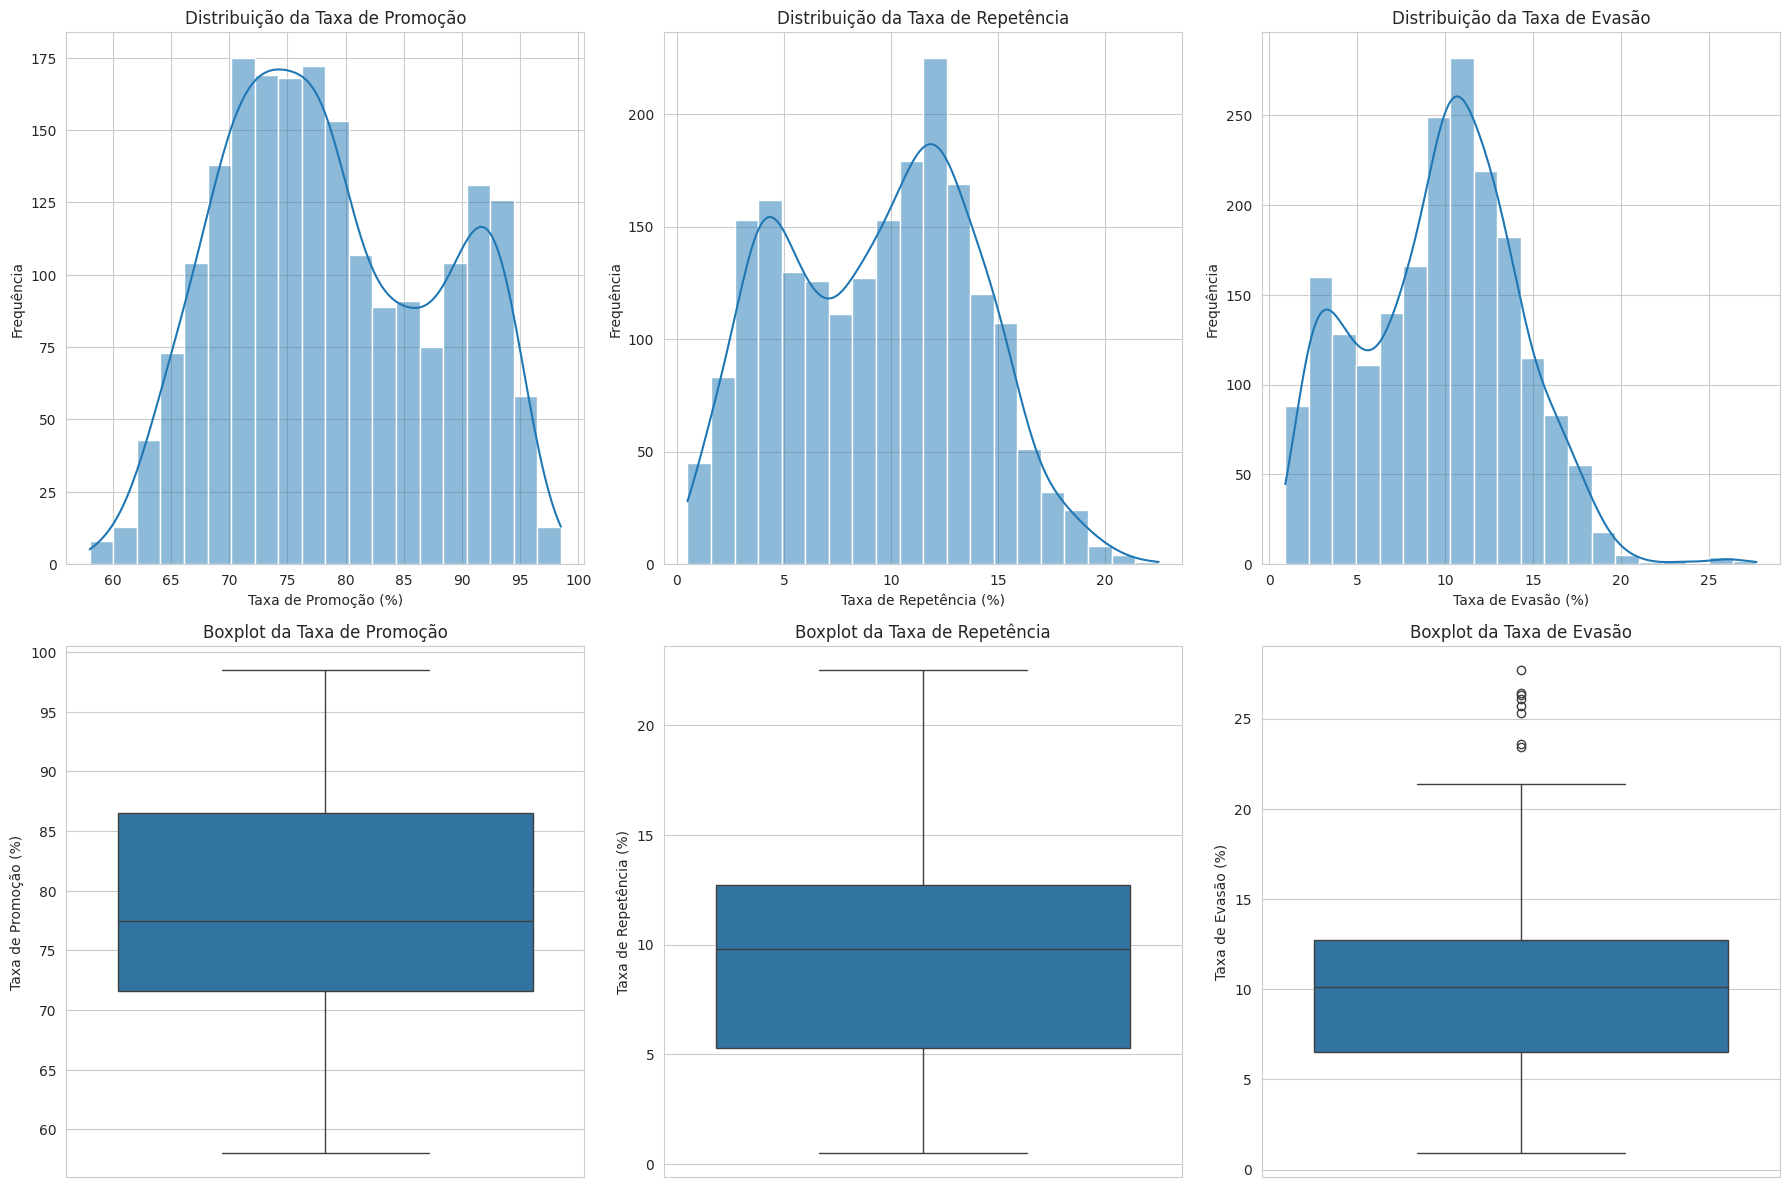

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

# Histograma e KDE da Taxa de Promoção
plt.subplot(2, 3, 1)
sns.histplot(df_ensino_medio_selecionada['tx_promocao'].dropna(), kde=True, bins=20)
plt.title('Distribuição da Taxa de Promoção')
plt.xlabel('Taxa de Promoção (%)')
plt.ylabel('Frequência')

# Boxplot da Taxa de Promoção
plt.subplot(2, 3, 4)
sns.boxplot(y=df_ensino_medio_selecionada['tx_promocao'].dropna())
plt.title('Boxplot da Taxa de Promoção')
plt.ylabel('Taxa de Promoção (%)')

# Histograma e KDE da Taxa de Repetência
plt.subplot(2, 3, 2)
sns.histplot(df_ensino_medio_selecionada['tx_repetencia'].dropna(), kde=True, bins=20)
plt.title('Distribuição da Taxa de Repetência')
plt.xlabel('Taxa de Repetência (%)')
plt.ylabel('Frequência')

# Boxplot da Taxa de Repetência
plt.subplot(2, 3, 5)
sns.boxplot(y=df_ensino_medio_selecionada['tx_repetencia'].dropna())
plt.title('Boxplot da Taxa de Repetência')
plt.ylabel('Taxa de Repetência (%)')

# Histograma e KDE da Taxa de Evasão
plt.subplot(2, 3, 3)
sns.histplot(df_ensino_medio_selecionada['tx_evasao'].dropna(), kde=True, bins=20)
plt.title('Distribuição da Taxa de Evasão')
plt.xlabel('Taxa de Evasão (%)')
plt.ylabel('Frequência')

# Boxplot da Taxa de Evasão
plt.subplot(2, 3, 6)
sns.boxplot(y=df_ensino_medio_selecionada['tx_evasao'].dropna())
plt.title('Boxplot da Taxa de Evasão')
plt.ylabel('Taxa de Evasão (%)')

plt.tight_layout()
plt.show()

### 4.3 - Tendências Temporais

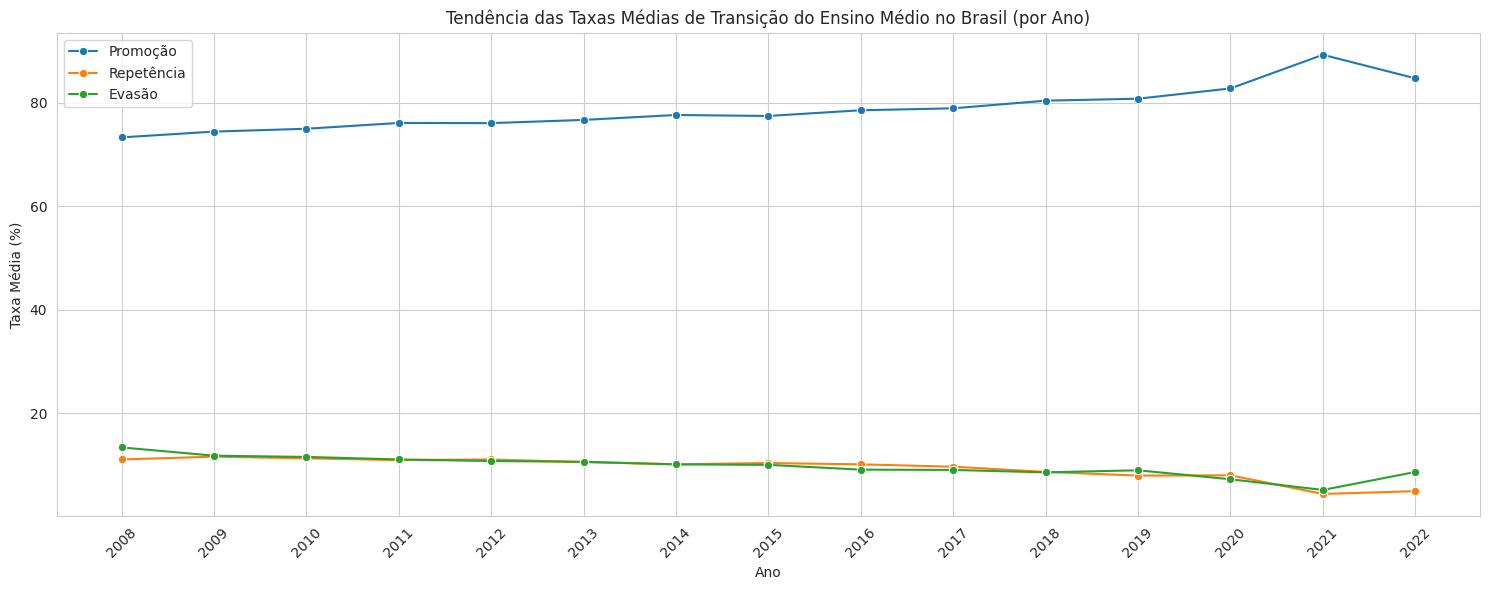

In [ ]:
df_yearly_avg = df_ensino_medio_selecionada.groupby('ano')[['tx_promocao', 'tx_repetencia', 'tx_evasao']].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='ano', y='tx_promocao', data=df_yearly_avg, label='Promoção', marker='o')
sns.lineplot(x='ano', y='tx_repetencia', data=df_yearly_avg, label='Repetência', marker='o')
sns.lineplot(x='ano', y='tx_evasao', data=df_yearly_avg, label='Evasão', marker='o')
plt.title('Tendência das Taxas Médias de Transição do Ensino Médio no Brasil (por Ano)')
plt.xlabel('Ano')
plt.ylabel('Taxa Média (%)')
plt.xticks(df_yearly_avg['ano'].unique(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.4 - Análise Regional


### Taxas Médias de Transição do Ensino Médio por Região ###


,regiao,tx_promocao,tx_repetencia,tx_evasao
0,Centro-Oeste,77.902807,9.984561,9.718596
1,Nordeste,77.792741,9.552148,10.694222
2,Norte,78.387238,9.377524,9.500190
3,Sudeste,81.134000,8.350333,8.264667
4,Sul,80.559556,9.148444,9.039556


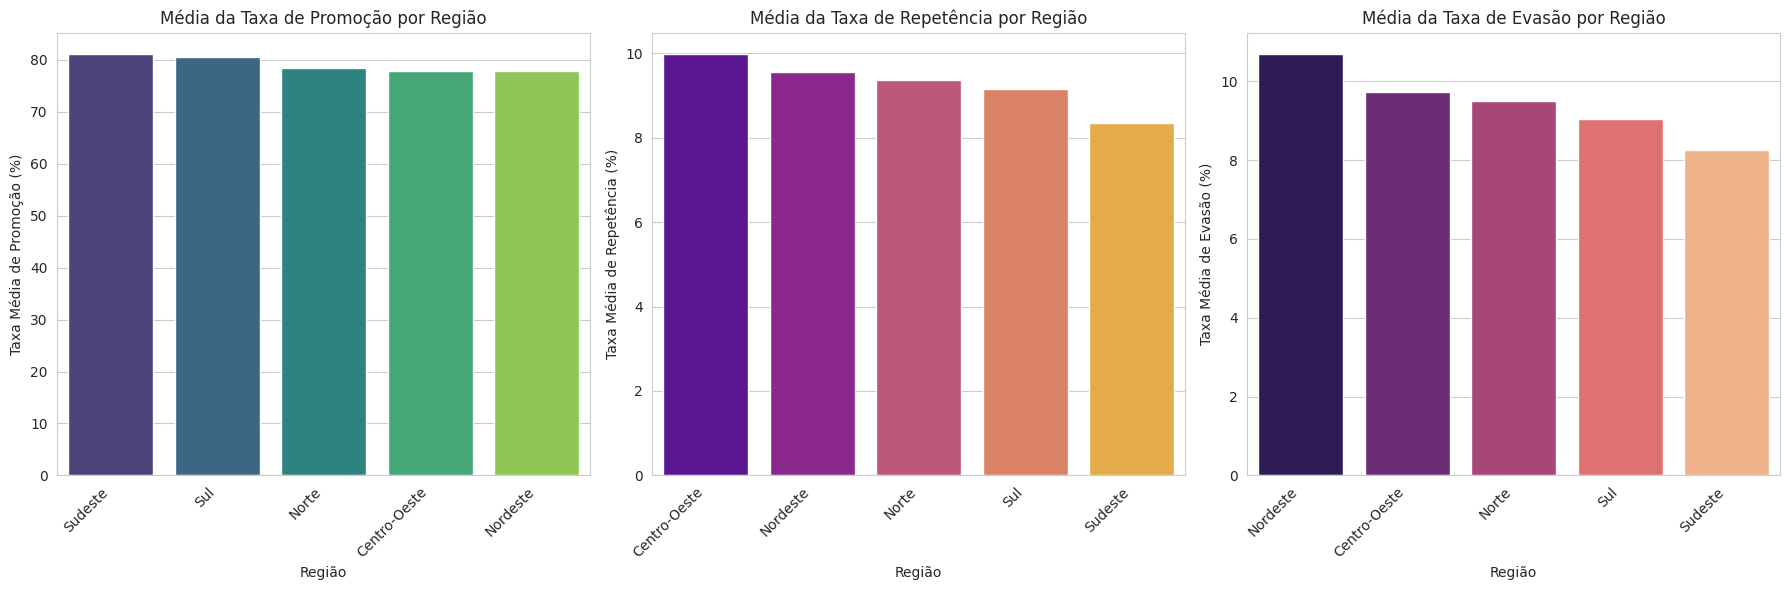

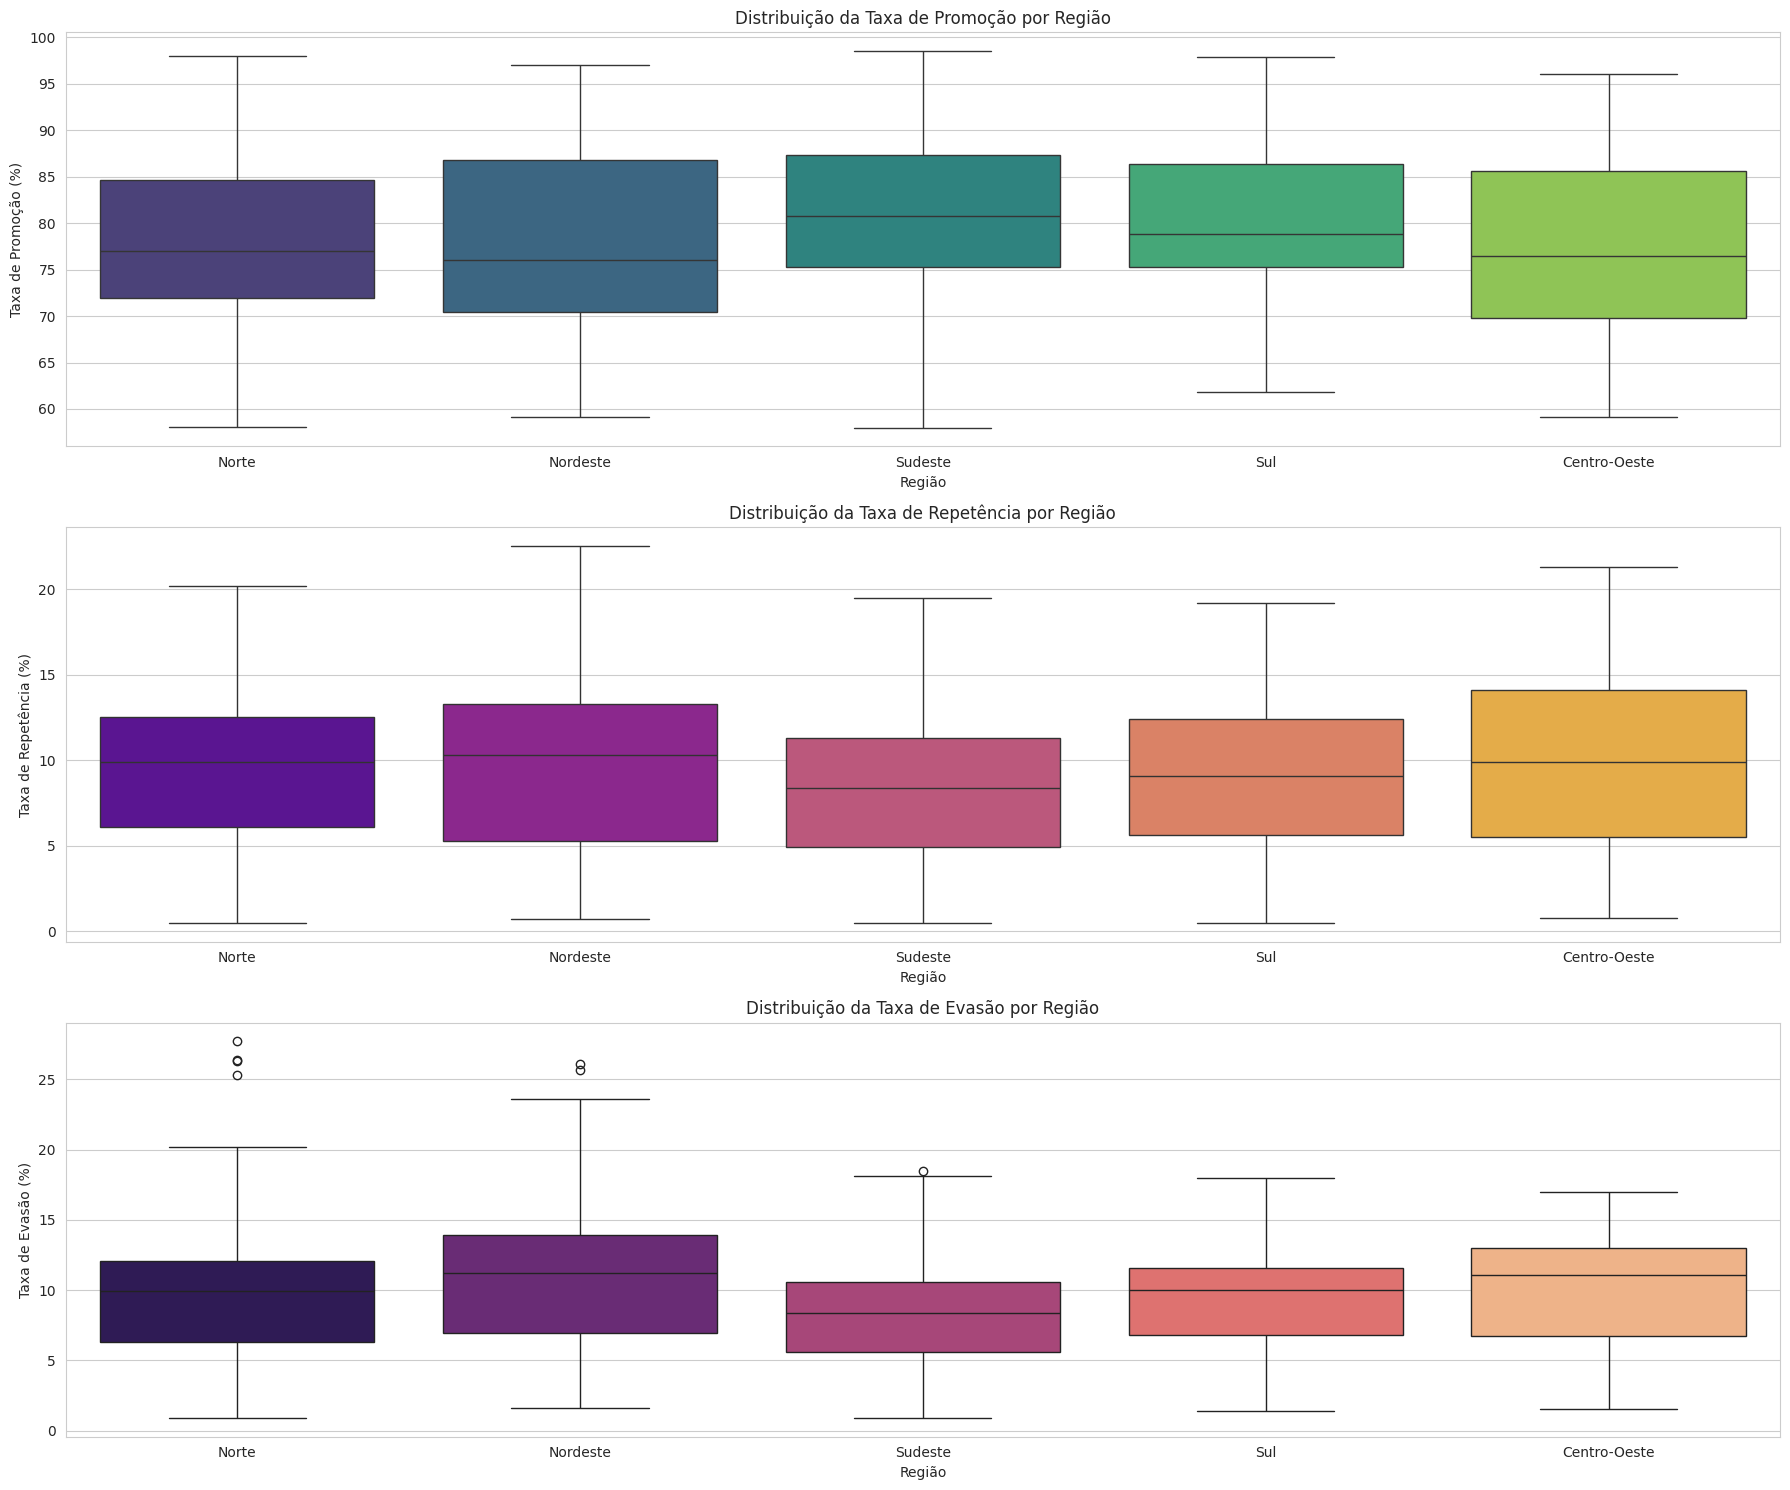

In [ ]:
df_regiao_avg = df_ensino_medio_selecionada.groupby('regiao')[['tx_promocao', 'tx_repetencia', 'tx_evasao']].mean().reset_index()

print("\n### Taxas Médias de Transição do Ensino Médio por Região ###")
display(df_regiao_avg)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='regiao', y='tx_promocao', data=df_regiao_avg.sort_values(by='tx_promocao', ascending=False), palette='viridis', hue='regiao', legend=False)
plt.title('Média da Taxa de Promoção por Região')
plt.xlabel('Região')
plt.ylabel('Taxa Média de Promoção (%)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='regiao', y='tx_repetencia', data=df_regiao_avg.sort_values(by='tx_repetencia', ascending=False), palette='plasma', hue='regiao', legend=False)
plt.title('Média da Taxa de Repetência por Região')
plt.xlabel('Região')
plt.ylabel('Taxa Média de Repetência (%)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='regiao', y='tx_evasao', data=df_regiao_avg.sort_values(by='tx_evasao', ascending=False), palette='magma', hue='regiao', legend=False)
plt.title('Média da Taxa de Evasão por Região')
plt.xlabel('Região')
plt.ylabel('Taxa Média de Evasão (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x='regiao', y='tx_promocao', data=df_ensino_medio_selecionada, palette='viridis', hue='regiao', legend=False)
plt.title('Distribuição da Taxa de Promoção por Região')
plt.xlabel('Região')
plt.ylabel('Taxa de Promoção (%)')

plt.subplot(3, 1, 2)
sns.boxplot(x='regiao', y='tx_repetencia', data=df_ensino_medio_selecionada, palette='plasma', hue='regiao', legend=False)
plt.title('Distribuição da Taxa de Repetência por Região')
plt.xlabel('Região')
plt.ylabel('Taxa de Repetência (%)')

plt.subplot(3, 1, 3)
sns.boxplot(x='regiao', y='tx_evasao', data=df_ensino_medio_selecionada, palette='magma', hue='regiao', legend=False)
plt.title('Distribuição da Taxa de Evasão por Região')
plt.xlabel('Região')
plt.ylabel('Taxa de Evasão (%)')

plt.tight_layout()
plt.show()

### 4.5 - Análise de Correlação entre as Taxas

### Matriz de Correlação entre as Taxas ###


,tx_promocao,tx_repetencia,tx_evasao
tx_promocao,1.000000,-0.937606,-0.912844
tx_repetencia,-0.937606,1.000000,0.760090
tx_evasao,-0.912844,0.760090,1.000000


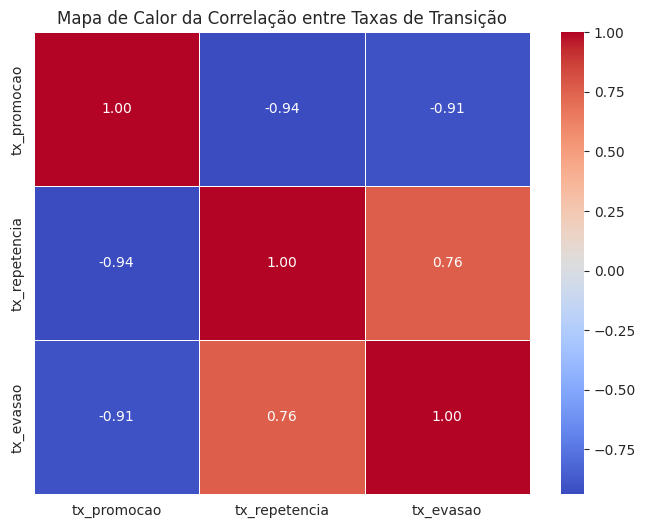

In [ ]:
correlation_matrix = df_ensino_medio_selecionada[['tx_promocao', 'tx_repetencia', 'tx_evasao']].corr()

print("### Matriz de Correlação entre as Taxas ###")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Taxas de Transição')
plt.show()